In [1]:
import numpy as np
import xarray as xr
from modules.ADI import ADI
from modules.classes import Quantity2D, Analytic, Interpolate
from modules.tests import plot_mass_conservation, calculate_boundary_flux, integrate_concentration
from modules.functions import animate
import matplotlib.pyplot as plt

In [2]:
# Initialize a constant diffusion coefficient function
'''
diffusion = Analytic(lambda x, y: y**2)
diffusion.set_partial_x(lambda x, y: y)
diffusion.set_partial_y(lambda x, y: x)
'''


'\ndiffusion = Analytic(lambda x, y: y**2)\ndiffusion.set_partial_x(lambda x, y: y)\ndiffusion.set_partial_y(lambda x, y: x)\n'

(<Figure size 640x480 with 1 Axes>,
 <Axes3D: xlabel='x', ylabel='y', zlabel='z'>)

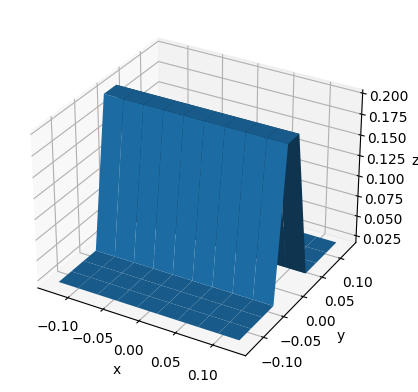

In [3]:
n_grid = 50
n_time = 500
dt = 0.0001
dx = 0.005
dy = 0.005
conc = Quantity2D(
    n_grid,
    n_time,
    (-0.5*n_grid*dx, 0.5*n_grid*dx),
    (-0.5*n_grid*dy, 0.5*n_grid*dy),
    (0, dt*n_time),
)

diffarr = 0.02*np.ones((10, 10))
diffarr[:,4:-4] = 0.2 # Vary along x; partial_x should be constant
xint = np.linspace(-0.5*n_grid*dx, 0.5*n_grid*dx, 10)
yint = np.linspace(-0.5*n_grid*dy, 0.5*n_grid*dy, 10)
diffusion = Interpolate(diffarr, xint, yint, s=0)

diffusion.plot_2D(func='func')

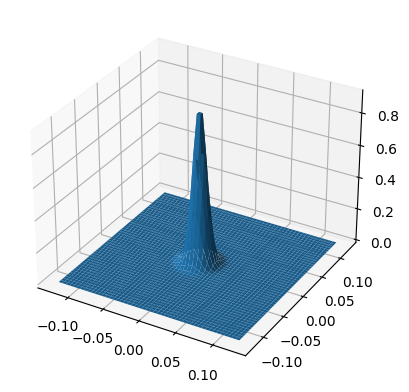

In [4]:
xcoords = conc.xcoords
ycoords = conc.ycoords
X, Y = np.meshgrid(xcoords, ycoords)
initial_condition =  1*np.exp(- (X**2 + Y**2)/(0.05*dx*n_grid)**2)
#initial_condition = np.empty_like(X)
#initial_condition[n_grid//2, n_grid//2] = 100

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, initial_condition)

In [5]:
result_ds = ADI(conc, diffusion, initial_condition, BC='open')
# Issue with explicit component vectors blowing up to infinity/nan values

In [6]:
result_ds

<xarray.Dataset> Size: 10MB
Dimensions:        (x: 50, y: 50, t: 500)
Coordinates:
  * x              (x) float64 400B -0.125 -0.1199 -0.1148 ... 0.1199 0.125
  * y              (y) float64 400B -0.125 -0.1199 -0.1148 ... 0.1199 0.125
  * t              (t) float64 4kB 0.0 0.0001002 0.0002004 ... 0.0499 0.05
Data variables:
    concentration  (x, y, t) float64 10MB 1.384e-87 -2.458e-72 ... -6.6e-20
    diffusion      (x, y) float64 20kB 0.02 0.01586 0.01423 ... 0.01586 0.02
Attributes:
    dx:        0.00510204081632653
    dy:        0.00510204081632653
    dt:        0.0001002004008016032
    n_grid:    50
    n_time:    500
    metadata:  Generated by crank_nicholson_1D

In [7]:
result_ds.to_netcdf('test_file.nc')

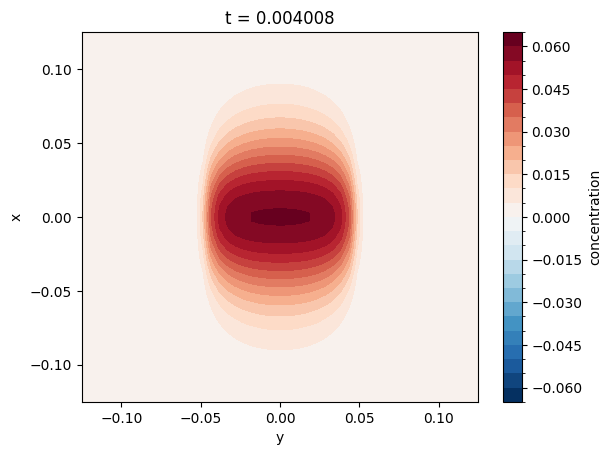

In [8]:
xr.plot.contourf(result_ds['concentration'].isel(t=40), levels=30)

In [9]:
from matplotlib import animation
from mpl_toolkits.axes_grid1 import make_axes_locatable

def animate(ds, vmin=None, vmax=None, cmap='RdBu_r', levels=30):
    if not vmax:
        vmax = ds['concentration'].max()
        vmin = -vmax

    n_time = ds.attrs['n_time']
    fig, ax = plt.subplots()
    div = make_axes_locatable(ax)
    cax = div.append_axes('right', '5%', '5%')
    x = ds.coords['x']
    y = ds.coords['y']
    tcoords = ds.coords['t'].values
    z = ds['concentration'].values
    conc = ax.contourf(x, y, z[:,:,0], cmap=cmap, levels=levels)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    def animate(t):
        ax.clear()
        #cax.cla()
        ax.set_title("time = %.3g" % tcoords[t])
        conc = ax.contourf(x, y, z[:,:,t], cmap=cmap, levels=levels)
        #cbar = fig.colorbar(conc)
        #conc.set_array(z[:,:,t])
        return conc,
    anim = animation.FuncAnimation(fig, animate, frames = n_time, interval=1, repeat=True, blit=False)
    writergif = animation.PillowWriter(fps=20)
    return anim, writergif

In [10]:
'''
anim, writergif = animate(result_ds, levels=100)
anim.save(r'test.gif',writer=writergif)
plt.show()
'''

"\nanim, writergif = animate(result_ds, levels=100)\nanim.save(r'test.gif',writer=writergif)\nplt.show()\n"

-8.714775516140411e-41
-3.362489074738269e-16
-2.1298647196198068e-14
-5.976119987378396e-13
-9.866023706825293e-12
-1.077122741717393e-10
-8.320242203585505e-10
-4.773845514450429e-09
-2.1190707695931273e-08
-7.550394891388106e-08
-2.233622057990243e-07
-5.654623148250357e-07
-1.2575724472188705e-06
-2.511736726737856e-06
-4.588005912105186e-06
-7.77895189367565e-06
-1.2390557384403554e-05
-1.87229556867755e-05
-2.7053576199453744e-05
-3.762412930814476e-05
-5.063189643238611e-05
-6.622511254283305e-05
-8.450183848560558e-05
-0.00010551155770136172
-0.0001292587221451066
-0.00015570755082855675
-0.0001847875038364308
-0.000216398983850556
-0.000250418938188389
-0.00028670613836124674
-0.0003251059982882469
-0.0003654548570665004
-0.0004075836998159001
-0.0004513213234710857
-0.0004964969764204394
-0.0005429425142652238
-0.0005904941209656342
-0.0006389936471013242
-0.0006882896163478533
-0.0007382379486553453
-0.0007887024448212804
-0.0008395550727560174
-0.0008906760911496967
-0.0009

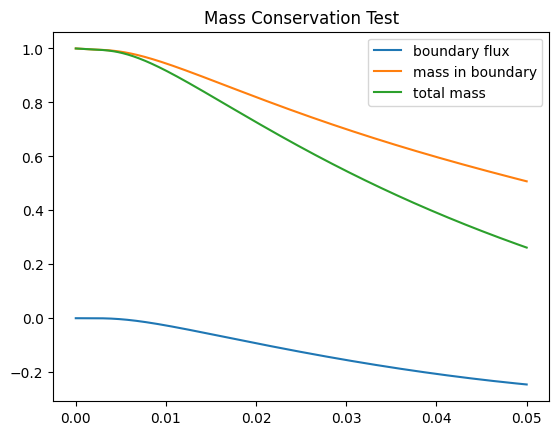

In [11]:
fig, ax = plot_mass_conservation(result_ds)

In [12]:
from modules.tests import test_gaussian
import xarray as xr
diff = test_gaussian(ADI)

In [13]:
diff

<xarray.DataArray 'concentration' (x: 50, y: 50, t: 500)> Size: 10MB
array([[[ 0.00000000e+00,  4.00786629e+01, -4.28326597e+01, ...,
         -1.25402721e+00, -1.25282229e+00, -1.25162519e+00],
        [ 0.00000000e+00, -4.03390358e+01, -4.02167978e+01, ...,
         -9.38749219e+00, -9.35573079e+00, -9.32414403e+00],
        [ 0.00000000e+00, -4.03935119e+01, -4.02703277e+01, ...,
         -1.01586016e+01, -1.01270109e+01, -1.00955857e+01],
        ...,
        [ 0.00000000e+00, -4.03935267e+01, -4.02703100e+01, ...,
         -1.05675544e+01, -1.05360477e+01, -1.05047062e+01],
        [ 0.00000000e+00, -4.03724348e+01, -4.02273988e+01, ...,
         -1.23172146e+01, -1.22804871e+01, -1.22439514e+01],
        [ 0.00000000e+00, -4.20801313e+01, -4.35184517e+01, ...,
         -2.19463774e+01, -2.18710910e+01, -2.17962167e+01]],

       [[ 0.00000000e+00, -2.06291646e+00, -2.29839251e-01, ...,
         -1.00203892e+00, -1.00203064e+00, -1.00202241e+00],
        [ 0.00000000e+00, -2.33905519e-02, -6.09211927e-02, ...,
         -9.56957188e-01, -9.57094294e-01, -9.57230753e-01],
        [ 0.00000000e+00, -2.50664635e-02, -6.27117565e-02, ...,
         -9.54171521e-01, -9.54300666e-01, -9.54429240e-01],
...
        [ 0.00000000e+00, -2.49025546e-02, -6.47418683e-02, ...,
         -9.69576526e-01, -9.69644592e-01, -9.69712372e-01],
        [ 0.00000000e+00, -2.23555553e-02, -5.98291697e-02, ...,
         -9.63941621e-01, -9.64020692e-01, -9.64099429e-01],
        [ 0.00000000e+00,  6.32374296e-02,  9.70373384e-02, ...,
         -9.33176195e-01, -9.33346276e-01, -9.33515603e-01]],

       [[ 0.00000000e+00,  3.98462197e+01, -3.56073202e+01, ...,
         -7.26483543e-01, -7.27795211e-01, -7.29098268e-01],
        [ 0.00000000e+00, -4.01995379e+01, -4.21448993e+01, ...,
         -9.49674392e+00, -9.46435153e+00, -9.43213834e+00],
        [ 0.00000000e+00, -4.02599198e+01, -4.20897061e+01, ...,
         -1.02695232e+01, -1.02373307e+01, -1.02053078e+01],
        ...,
        [ 0.00000000e+00, -4.02599344e+01, -4.20898479e+01, ...,
         -1.06853605e+01, -1.06532401e+01, -1.06212889e+01],
        [ 0.00000000e+00, -4.02327480e+01, -4.22773417e+01, ...,
         -1.24713445e+01, -1.24338232e+01, -1.23964992e+01],
        [ 0.00000000e+00, -4.18476797e+01, -4.88582541e+01, ...,
         -2.22493680e+01, -2.21724064e+01, -2.20958688e+01]]])
Coordinates:
  * x        (x) float64 400B -10.0 -9.592 -9.184 -8.776 ... 9.184 9.592 10.0
  * y        (y) float64 400B -10.0 -9.592 -9.184 -8.776 ... 9.184 9.592 10.0
  * t        (t) float64 4kB 0.0 0.002004 0.004008 0.006012 ... 0.996 0.998 1.0

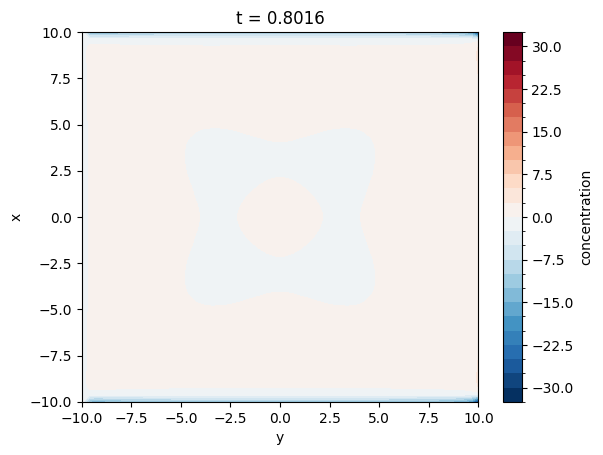

In [14]:
xr.plot.contourf(diff.isel(t=100), levels=30)

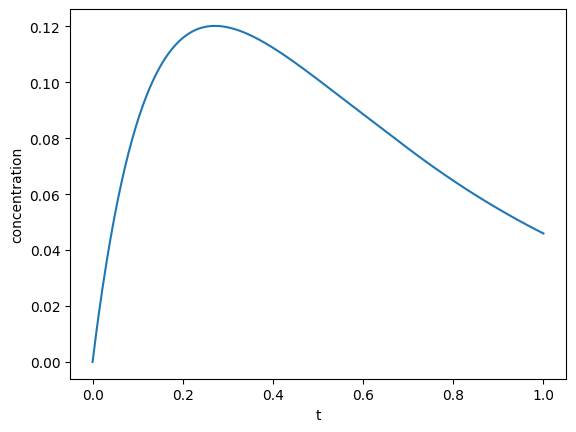

In [15]:
diff.median(dim=('x','y')).plot()

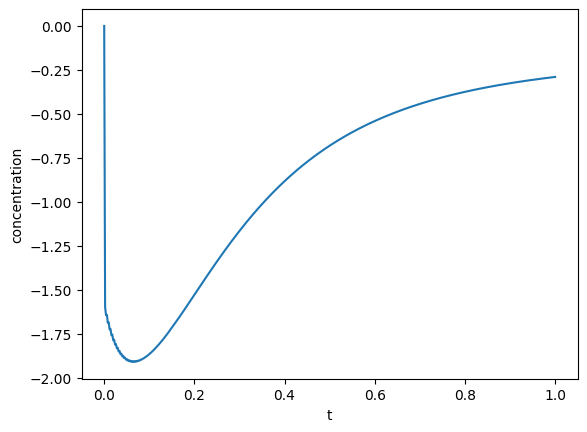

In [16]:
diff.mean(dim=('x','y')).plot()